## Загрузка данных


In [5]:
import requests
import pandas as pd

url = "https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json"
response = requests.get(url)

if response.status_code == 200:
    json_data = response.json()
else:
    json_data = pd.read_json('deviation.json')

df = pd.DataFrame(json_data)

df

ConnectionError: HTTPSConnectionPool(host='ai-process-sandy.s3.eu-west-1.amazonaws.com', port=443): Max retries exceeded with url: /purge/deviation.json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f8b0955ac20>: Failed to resolve 'ai-process-sandy.s3.eu-west-1.amazonaws.com' ([Errno -3] Temporary failure in name resolution)"))

## Создание класса


In [ ]:
import os
import matplotlib.pyplot as plt


class PlotDrawer:
    def __init__(self):
        self.plot_folder = "plots"
        # Создание папки для графиков, если она не существует
        if not os.path.exists(self.plot_folder):
            os.makedirs(self.plot_folder)

    def calculate_statistic(self, dataframe):
        columns = ['gt_corners', 'rb_corners', 'mean', 'max', 'min', 'floor_mean',
                   'floor_max', 'floor_min', 'ceiling_mean', 'ceiling_max', 'ceiling_min']
        statistics = dataframe[columns].describe()
        print("\n\nРезультаты describe:\n\n", statistics)

    def draw_histogram(self, series, bins, alpha, label):
        plt.hist(series, bins=bins, alpha=alpha, label=label)

    def draw_plots(self, dataframe):
        fig, axs = plt.subplots(4, 1, figsize=(8, 20))
        axs[0].hist(dataframe['gt_corners'], bins=10,
                    alpha=0.9, label='Gt_corners')
        axs[0].hist(dataframe['rb_corners'], bins=20,
                    alpha=0.3, label='Rb_corners')
        axs[0].set_title('Gt_corners vs Rb_corners')
        axs[0].set_xlabel('Отклонение')
        axs[0].set_ylabel('Частота')
        axs[0].legend()

        columns = [['mean', 'max', 'min'], ['floor_mean', 'floor_max', 'floor_min'],
                   ['ceiling_mean', 'ceiling_max', 'ceiling_min']]
        labels = ['Mean', 'Floor', 'Ceiling']

        for ax, cols, label in zip(axs[1:], columns, labels):
            for col in cols:
                ax.hist(dataframe[col], bins=10, alpha=0.5, label=col)
            ax.set_title(label)
            ax.set_xlabel('Отклонение в градусах')
            ax.set_ylabel('Частота')
            ax.legend()

        plt.tight_layout()
        plt.savefig(os.path.join(self.plot_folder, "corners_comparison.png"))
        plt.show()

## Вывод статистики


In [ ]:
calc_statistic = PlotDrawer()
calc = calc_statistic.calculate_statistic(df)



Результаты describe:

         gt_corners   rb_corners         mean          max          min  \
count  1347.000000  1347.000000  1347.000000  1347.000000  1347.000000   
mean      4.307350     4.307350    12.895320    25.448011     2.920388   
std       0.814412     0.814412    21.839948    42.758159     9.258972   
min       4.000000     4.000000     0.192973     0.323886     0.007456   
25%       4.000000     4.000000     0.658488     1.243804     0.147432   
50%       4.000000     4.000000     2.123456     4.703514     0.279876   
75%       4.000000     4.000000    14.810982    28.312051     0.674444   
max      10.000000    10.000000   121.301055   179.165483    81.764483   

        floor_mean    floor_max    floor_min  ceiling_mean  ceiling_max  \
count  1347.000000  1347.000000  1347.000000   1347.000000  1347.000000   
mean     11.022443    20.405499     3.146246     14.768198    24.848020   
std      19.136320    33.189081     9.559611     26.047057    42.345579   
min     

## Вывод графиков


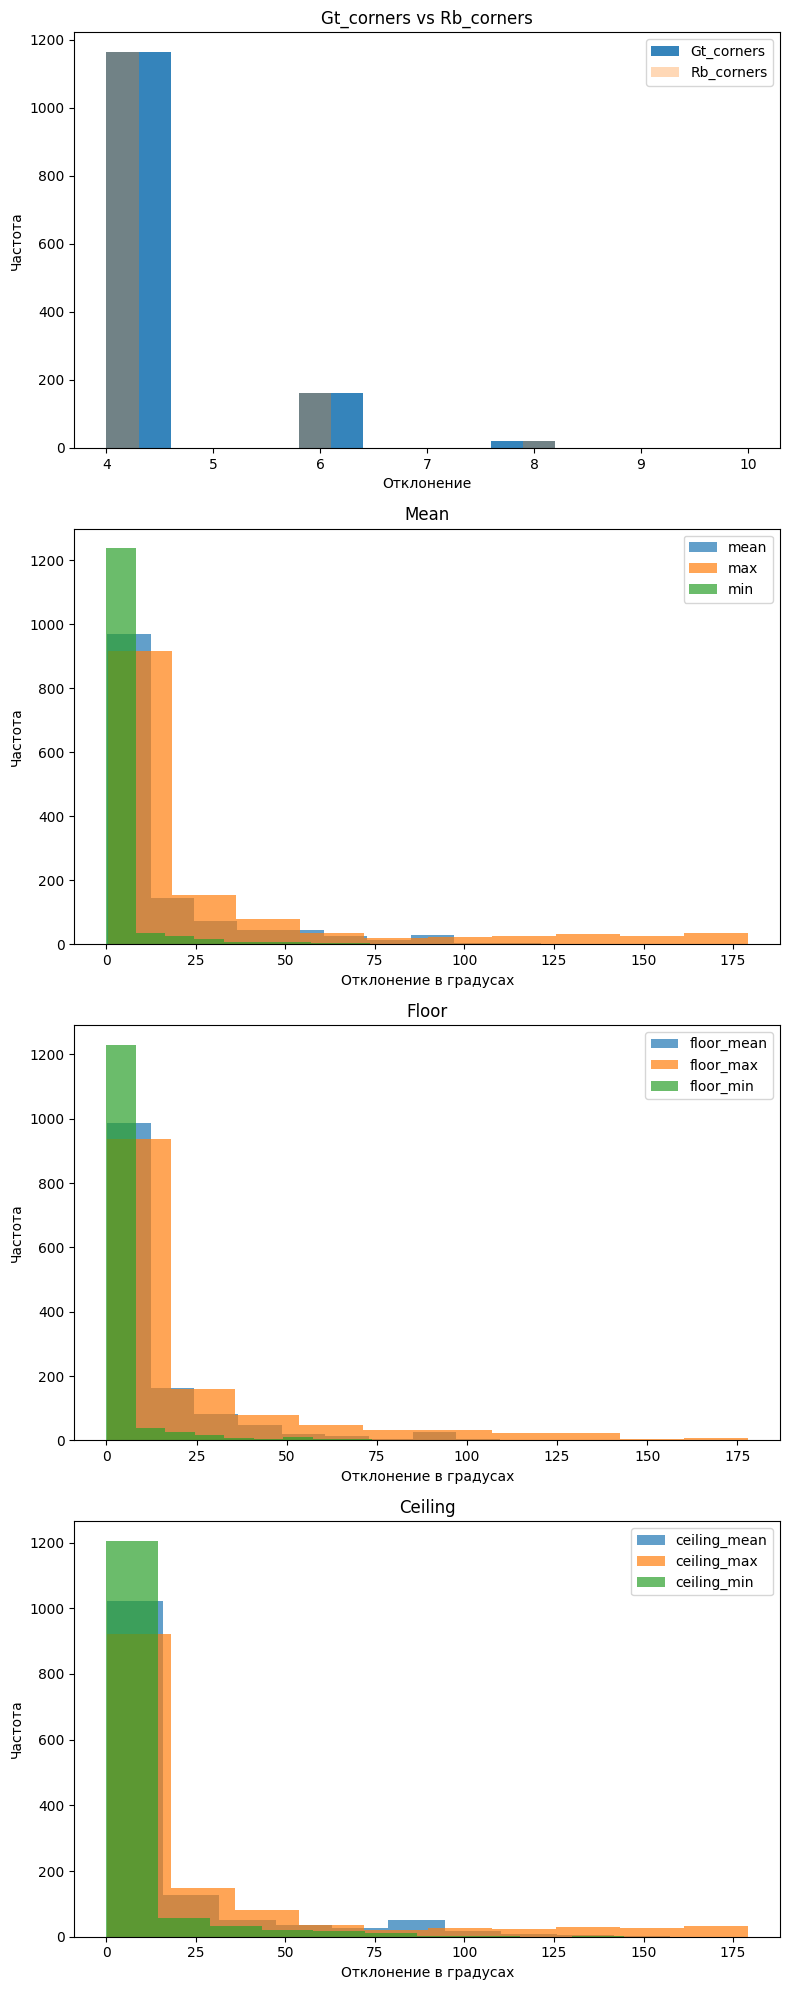

In [ ]:
plot_drawer = PlotDrawer()
plots = plot_drawer.draw_plots(df)